In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

!pwd

/Users/pranathipoojary/Projects/mummichog_proj/untargeted_pa


* Check beginning of run for solvent wash 
* Missing values 
* imputation 
* Check PCA plot
* RSD filtered?

In [2]:
meta_df = pd.read_csv('data/trans_omic_untargeted/s_MTBLS2542.txt', delimiter='\t')
meta_df = meta_df.rename(columns={'Source Name': 'sample_id', 
                'Factor Value[Gender]': 'gender',
                'Factor Value[Age]': 'age',
                'Factor Value[Disease severity]': 'disease_severity',
                'Factor Value[Collection date]': 'collection_date'
                })
meta_df = meta_df[['sample_id', 'gender', 'age', 'disease_severity', 'collection_date']]
meta_df['ion_mode'] = meta_df['sample_id'].str.split('_').str[-1]
meta_df['assay'] = meta_df['sample_id'].str.split('_').str[-2]
meta_df['disease_code'], code_map = pd.factorize(meta_df['disease_severity'])
meta_df['is_bad'] = meta_df['disease_severity'].map(lambda x: 0 if x in ['Asymptomatic', 'Mild'] else 1)
print(code_map)
#meta_df.to_csv('./data/trans_omic_untargeted/meta_data.csv', index=False)
meta_df = meta_df[
    (meta_df['ion_mode'] == 'POS')&
    (meta_df['assay'] == 'BEHC18')]

Index(['Mild', 'Death', 'severe', 'Critical Illness', 'Asymptomatic'], dtype='object')


/var/folders/t0/9s1kd78j2w76jjypvc2j3x900000gn/T/ipykernel_34289/3992680307.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='disease_severity', y='age', data=meta_df, palette='hls', fliersize=0, fill=False)
/var/folders/t0/9s1kd78j2w76jjypvc2j3x900000gn/T/ipykernel_34289/3992680307.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='disease_severity', y='age', data=meta_df, palette='hls', alpha=0.5)
/var/folders/t0/9s1kd78j2w76jjypvc2j3x900000gn/T/ipykernel_34289/3992680307.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='i

<Axes: xlabel='is_bad', ylabel='count'>

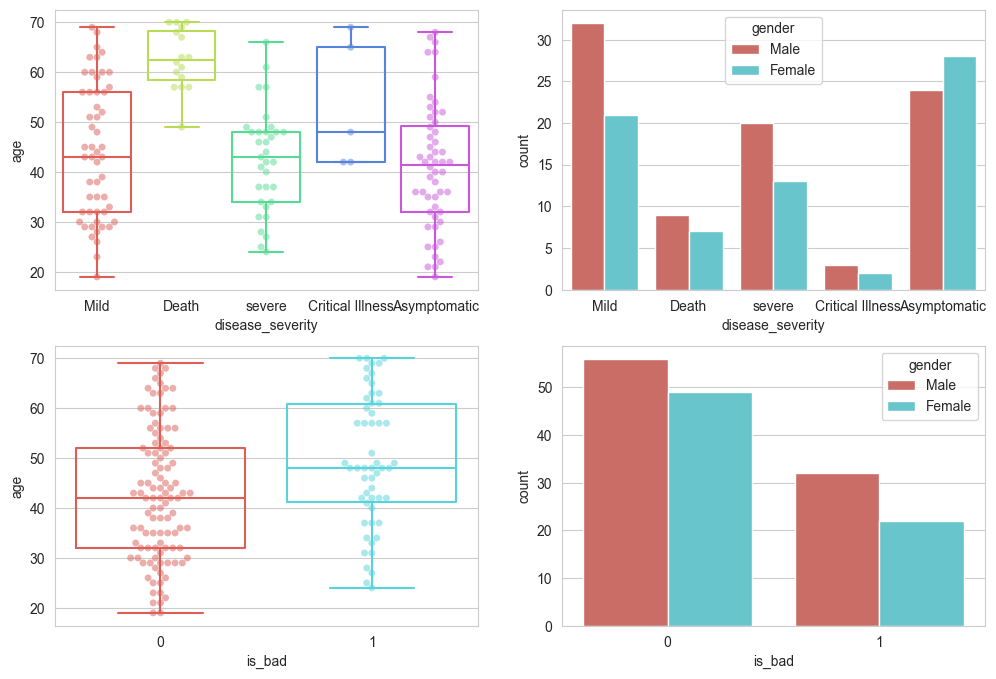

In [3]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.boxplot(x='disease_severity', y='age', data=meta_df, palette='hls', fliersize=0, fill=False)
sns.swarmplot(x='disease_severity', y='age', data=meta_df, palette='hls', alpha=0.5)

plt.subplot(2, 2, 2)
sns.countplot(data=meta_df, x="disease_severity", hue='gender', palette="hls")

plt.subplot(2, 2, 3)
sns.boxplot(x='is_bad', y='age', data=meta_df, palette='hls', fliersize=0, fill=False)
sns.swarmplot(x='is_bad', y='age', data=meta_df, palette='hls', alpha=0.5)

plt.subplot(2, 2, 4)
sns.countplot(data=meta_df, x='is_bad', hue='gender', palette="hls")

In [4]:
feat_df = pd.read_csv('./data/trans_omic_untargeted/MTBLS2542_pos_xcms_data.tsv', delimiter='\t')

samples = set(feat_df.columns[11:]).intersection(set(meta_df['sample_id']))
print(len(samples))
samples = sorted(list(samples))
feat_df = pd.concat((feat_df.iloc[:, :11], feat_df[samples]), axis=1)
feat_df.index = feat_df.namecustom

meta_df = meta_df[meta_df['sample_id'].isin(samples)].sort_values('sample_id')
print(feat_df.iloc[:, 11:].columns.tolist() == meta_df['sample_id'].tolist())
feat_df

158
True


,namecustom,mz,mzmin,mzmax,rt,rtmin,rtmax,npeaks,.,peakidx,...,20P02820306_BEHC18_POS,20P02820307_BEHC18_POS,20P02820310_BEHC18_POS,20P02820315_BEHC18_POS,20P02820317_BEHC18_POS,20P02820320_BEHC18_POS,20P02820322_BEHC18_POS,20P02820323_BEHC18_POS,20P02820326_BEHC18_POS,20P02820328_BEHC18_POS
namecustom,,,,,,,,,,,,,,,,,,,,,
M70.012655T6.8029,M70.012655T6.8029,70.012655,70.012441,70.012866,6.802862,-4.306548,20.565519,124,80,"574,57345,57347,87596,87598,116782,145403,1745...",...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
M70.012719T34.1993,M70.012719T34.1993,70.012719,70.011747,70.022089,34.199348,21.360931,41.058090,223,151,"573,28974,57346,57763,87597,88431,116783,14540...",...,3.222541e+07,2.875877e+07,2.735000e+07,2.828652e+07,2.944686e+07,2.725801e+07,3.060592e+07,2.376903e+07,2.927722e+07,2.601123e+07
M70.028662T208.923,M70.028662T208.923,70.028662,70.017600,70.028933,208.923050,201.752472,232.086990,86,84,"4561,62072,92099,121121,149625,217720,373628,4...",...,0.000000e+00,0.000000e+00,3.640831e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
M70.040111T62.9008,M70.040111T62.9008,70.040111,70.033585,70.040163,62.900841,61.013107,76.662460,57,56,"2380,89545,118717,215140,272845,331902,370151,...",...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
M70.045983T516.9796,M70.045983T516.9796,70.045983,70.039073,70.047824,516.979553,498.262238,529.465027,129,89,"13659,74334,102706,131213,160185,197575,257161...",...,0.000000e+00,1.077533e+05,0.000000e+00,1.139844e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.327267e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M1045.710889T573.4988,M1045.710889T573.4988,1045.710889,1045.708183,1045.712576,573.498779,572.900940,590.957581,132,132,"16437,46173,105727,134297,200913,260170,288867...",...,0.000000e+00,3.814784e+05,1.398053e+06,6.231486e+05,9.463168e+05,7.013964e+05,0.000000e+00,5.825724e+05,1.816569e+05,4.558075e+05
M1046.713234T573.4957,M1046.713234T573.4957,1046.713234,1046.710665,1046.714457,573.495667,572.933716,574.059570,61,61,"16343,105685,134234,200837,260132,288824,38982...",...,0.000000e+00,0.000000e+00,2.556463e+05,1.296108e+05,1.735132e+05,0.000000e+00,0.000000e+00,1.057493e+05,0.000000e+00,0.000000e+00
M1047.735905T588.2926,M1047.735905T588.2926,1047.735905,1047.733621,1047.736693,588.292603,583.207336,588.981750,161,158,"17719,47214,78312,106883,135526,164033,202180,...",...,9.157259e+06,6.595702e+06,1.314326e+07,1.050678e+07,1.053177e+07,1.047843e+07,1.569181e+06,7.353986e+06,1.223942e+07,9.745084e+06


Text(0, 0.5, 'm/z')

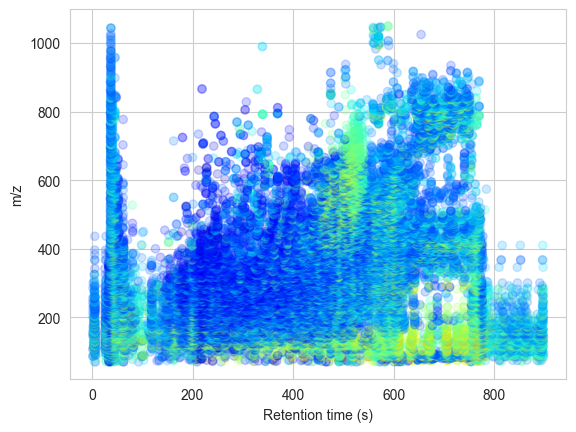

In [5]:
med_ints = np.log1p(feat_df.iloc[:, 12:].replace(0, np.nan)).median(axis=1)
scatter = plt.scatter(x=feat_df['rt'], y=feat_df['mz'], alpha=0.2, c=med_ints, cmap='jet')
plt.xlabel('Retention time (s)')
plt.ylabel('m/z')

<Axes: xlabel='rt', ylabel='mz'>

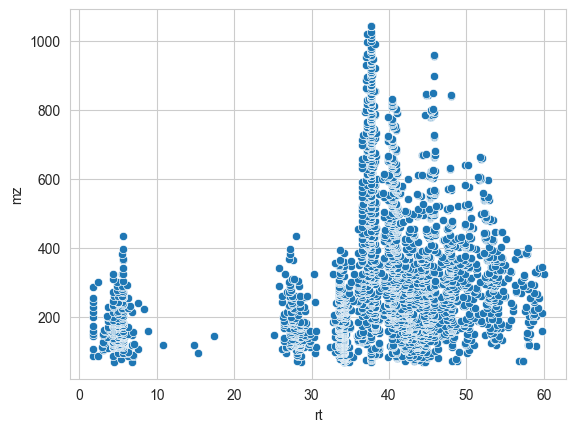

In [6]:
first_min = feat_df[feat_df['rt']<60]
sns.scatterplot(data=first_min, x='rt', y='mz')

Text(0.5, 0, 'Portion of missing values')

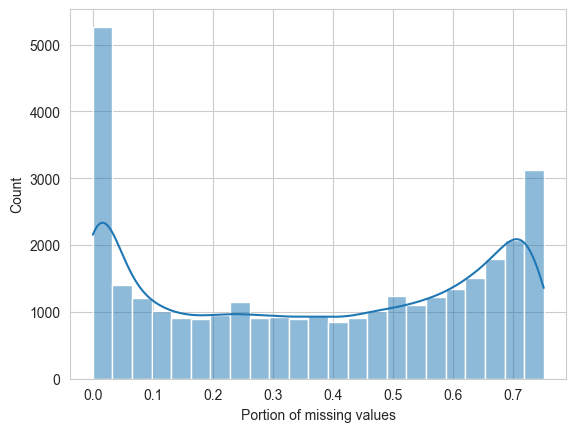

In [7]:
int_vals = feat_df.iloc[:, 12:]
int_vals = int_vals.replace(0, np.nan).values
missing_count = np.isnan(int_vals).mean(axis=1)

sns.histplot(x=missing_count, kde=1)
plt.xlabel('Portion of missing values')



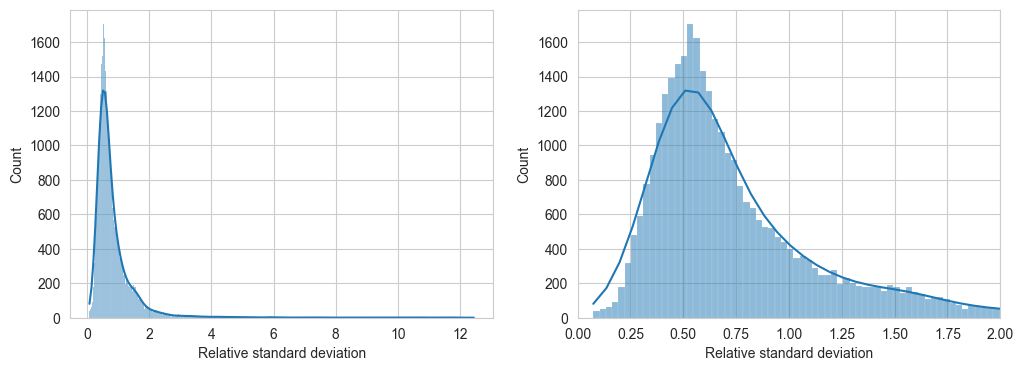

In [8]:
int_vals = feat_df.iloc[:, 12:]
int_vals = int_vals.replace(0, np.nan)
int_vals = int_vals.fillna(int_vals.median(axis=0))

mean = np.mean(int_vals, axis=1)
std = np.std(int_vals, axis=1, ddof=1)
rsd = std/mean

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(x=rsd, kde=1)
plt.xlabel('Relative standard deviation')

plt.subplot(1, 2, 2)
sns.histplot(x=rsd, kde=1)
plt.xlabel('Relative standard deviation')
plt.xlim(0, 2)


print()

141


Text(0, 0.5, 'PC3 (4.75% Variance)')

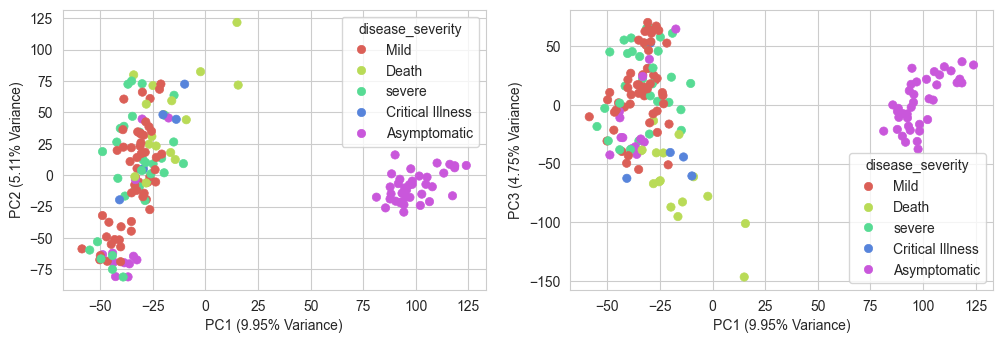

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

int_vals = feat_df.iloc[:, 11:].replace(0, np.nan)
int_vals = np.log1p(int_vals.fillna(int_vals.median()))
scaled_vals = StandardScaler().fit_transform(int_vals.T)
pca = PCA(n_components=0.95)
pcs = pca.fit_transform(scaled_vals)


plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x=pcs[:, 0], y=pcs[:, 1], edgecolor=None, hue=meta_df['disease_severity'], palette='hls')
explained_variance_ratio = pca.explained_variance_ratio_
print(len(explained_variance_ratio))
plt.xlabel(f"PC1 ({explained_variance_ratio[0]*100:.2f}% Variance)")
plt.ylabel(f"PC2 ({explained_variance_ratio[1]*100:.2f}% Variance)")

plt.subplot(2, 2, 2)
sns.scatterplot(x=pcs[:, 0], y=pcs[:, 2], edgecolor=None, hue=meta_df['disease_severity'], palette='hls')
explained_variance_ratio = pca.explained_variance_ratio_
plt.xlabel(f"PC1 ({explained_variance_ratio[0]*100:.2f}% Variance)")
plt.ylabel(f"PC3 ({explained_variance_ratio[2]*100:.2f}% Variance)")

Text(0, 0.5, 'PC3 (4.75% Variance)')

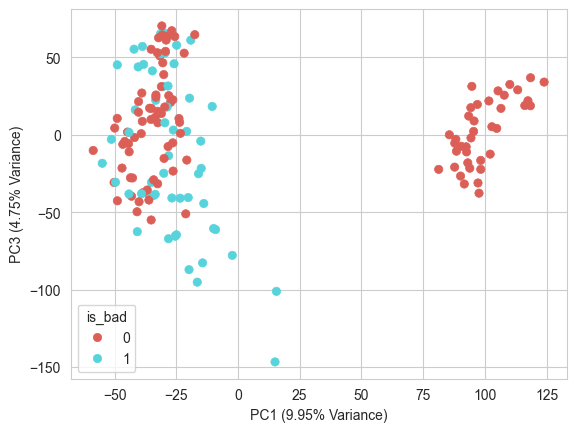

In [10]:
sns.scatterplot(x=pcs[:, 0], y=pcs[:, 2], edgecolor=None, hue=meta_df['is_bad'], palette='hls')
explained_variance_ratio = pca.explained_variance_ratio_
plt.xlabel(f"PC1 ({explained_variance_ratio[0]*100:.2f}% Variance)")
plt.ylabel(f"PC3 ({explained_variance_ratio[2]*100:.2f}% Variance)")

Text(0, 0.5, 'PC2 (5.11% Variance)')

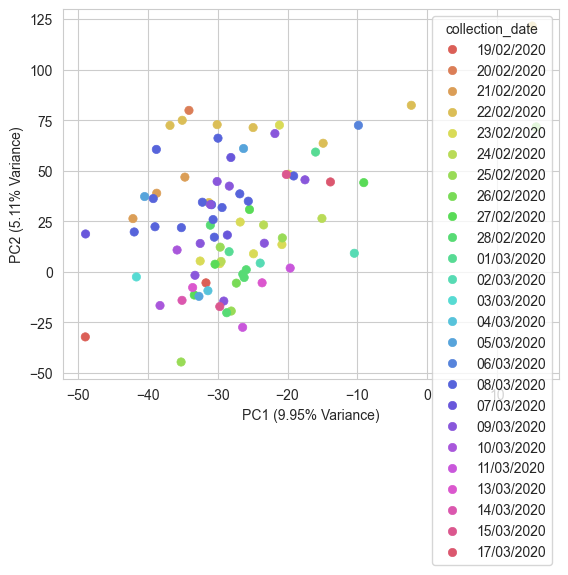

In [11]:
sns.scatterplot(x=pcs[:, 0], y=pcs[:, 1], edgecolor=None, hue=meta_df['collection_date'], palette='hls')
explained_variance_ratio = pca.explained_variance_ratio_
plt.xlabel(f"PC1 ({explained_variance_ratio[0]*100:.2f}% Variance)")
plt.ylabel(f"PC2 ({explained_variance_ratio[1]*100:.2f}% Variance)")

# Notes

* Age is certainly a covariate to account for. Gender is probably worth considering too. 
* The date collected is not recorded for many samples - but recording the date or not is modelled by PC1. Whats the cause e.g. different hospitals with different collection procedures?
* Very high portion of missing values and RSD 
* May be worth removing some of the solvent wash seen in the first 60 seconds but check with an expert as some annotations have a RT in the first 60 seconds. 

In [12]:
from sklearn.impute import KNNImputer

# features with more than 30% missing values are removed
int_df = feat_df.iloc[:, 11:].replace(0, np.nan)
missing_count = np.isnan(int_df).mean(axis=1)
int_df = int_df.loc[missing_count < 0.4, :]
org_n_features = len(feat_df)
print(f'Removed {org_n_features - len(int_df)} features or {100*(org_n_features - len(int_df))/org_n_features:.2f}%')

# imputation
imputer = KNNImputer()
imputed_vals = imputer.fit_transform(int_df)
int_df = pd.DataFrame(imputed_vals, columns=int_df.columns, index=int_df.index)


Removed 15847 features or 48.57%


In [13]:
# RSD >0.3 removed
mean = np.mean(int_df, axis=1)
std = np.std(int_df, axis=1, ddof=1)
rsd = std/mean
print(np.mean(rsd))
print("Length of int df", len(int_df))
int_df = int_df.loc[rsd < 0.4, :]
# int_df = int_df.loc[rsd < 1, :]
print("Length of int df", len(int_df))
new_mean = np.mean(int_df, axis=1)
new_std = np.std(int_df, axis=1, ddof=1)
new_rsd = new_std/new_mean

print(f"RSD changed from {np.mean(rsd)} to {np.mean(new_rsd)}")


0.8957033330093976
Length of int df 16780
Length of int df 4059
RSD changed from 0.8957033330093976 to 0.30400044436226126


In [14]:
int_df

,20P02820001_BEHC18_POS,20P02820002_BEHC18_POS,20P02820006_BEHC18_POS,20P02820016_BEHC18_POS,20P02820017_BEHC18_POS,20P02820018_BEHC18_POS,20P02820021_BEHC18_POS,20P02820023_BEHC18_POS,20P02820024_BEHC18_POS,20P02820026_BEHC18_POS,...,20P02820306_BEHC18_POS,20P02820307_BEHC18_POS,20P02820310_BEHC18_POS,20P02820315_BEHC18_POS,20P02820317_BEHC18_POS,20P02820320_BEHC18_POS,20P02820322_BEHC18_POS,20P02820323_BEHC18_POS,20P02820326_BEHC18_POS,20P02820328_BEHC18_POS
namecustom,,,,,,,,,,,,,,,,,,,,,
M70.065243T44.3972,9.586599e+06,7.135026e+06,6.042677e+06,1.952811e+07,1.761037e+07,1.310875e+07,1.036853e+07,1.915693e+07,1.533955e+07,1.098225e+07,...,1.357908e+07,1.404549e+07,1.346850e+07,1.681890e+07,1.155169e+07,1.347282e+07,1.119282e+07,9.292339e+06,1.043737e+07,1.438223e+07
M70.162528T573.481,1.527338e+05,1.254979e+05,9.983485e+04,1.399534e+05,8.672027e+04,1.187911e+05,3.125508e+05,5.384268e+04,1.068631e+05,1.282082e+05,...,1.251664e+05,8.001308e+04,1.651304e+05,1.372039e+05,2.267763e+05,1.766325e+05,6.652003e+04,1.236434e+05,6.293933e+04,1.506385e+05
M70.568609T582.7159_1,1.630222e+06,1.679354e+06,1.773759e+06,1.458265e+06,1.464937e+06,1.748485e+06,1.702127e+06,1.809147e+06,1.718124e+06,1.724389e+06,...,1.526437e+06,1.618204e+06,1.390878e+06,1.533255e+06,1.486871e+06,1.558230e+06,1.775366e+06,1.523314e+06,1.462615e+06,1.593489e+06
M70.718387T490.9966_1,7.690562e+05,8.072315e+05,6.793675e+05,9.386698e+05,8.927477e+05,8.940912e+05,5.080901e+05,5.036582e+05,1.326638e+06,4.474953e+05,...,3.965214e+05,8.420217e+05,7.019939e+05,6.955714e+05,5.382372e+05,5.283802e+05,5.148796e+05,6.100374e+05,4.969427e+05,6.217621e+05
M70.819398T582.6421_2,2.278647e+05,2.587944e+05,1.793223e+05,1.502793e+05,1.505071e+05,1.794005e+05,1.781022e+05,1.820294e+05,1.607552e+05,1.820779e+05,...,1.825304e+05,1.940488e+05,1.607462e+05,1.665075e+05,2.195927e+05,1.966584e+05,1.830991e+05,2.031128e+05,1.695326e+05,1.942003e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M1013.654106T569.3369,3.387082e+06,2.915657e+06,2.035393e+06,5.769962e+06,5.233523e+06,2.480226e+06,3.056964e+06,1.681912e+06,4.036360e+05,4.103777e+06,...,2.156486e+06,2.990340e+06,3.095060e+06,3.996117e+06,3.090744e+06,3.109460e+06,1.833830e+06,2.830819e+06,1.640916e+06,2.845244e+06
M1014.658321T569.4486,1.837005e+06,1.613000e+06,1.166852e+06,2.118565e+06,2.871239e+06,1.445033e+06,1.931238e+06,8.727952e+05,2.509858e+06,2.200103e+06,...,1.357932e+06,1.633428e+06,1.710665e+06,1.861301e+06,1.721583e+06,1.543918e+06,9.666535e+05,1.673647e+06,8.348217e+05,1.477050e+06
M1020.806625T37.1021,2.004014e+05,1.515335e+05,2.663923e+05,2.133854e+05,3.282085e+05,1.602519e+05,1.902045e+05,1.802091e+05,2.187664e+05,2.160553e+05,...,2.298926e+05,2.517092e+05,2.181655e+05,1.954623e+05,1.527324e+05,1.469564e+05,2.203481e+05,2.323592e+05,1.810723e+05,2.279131e+05


126


<Axes: >

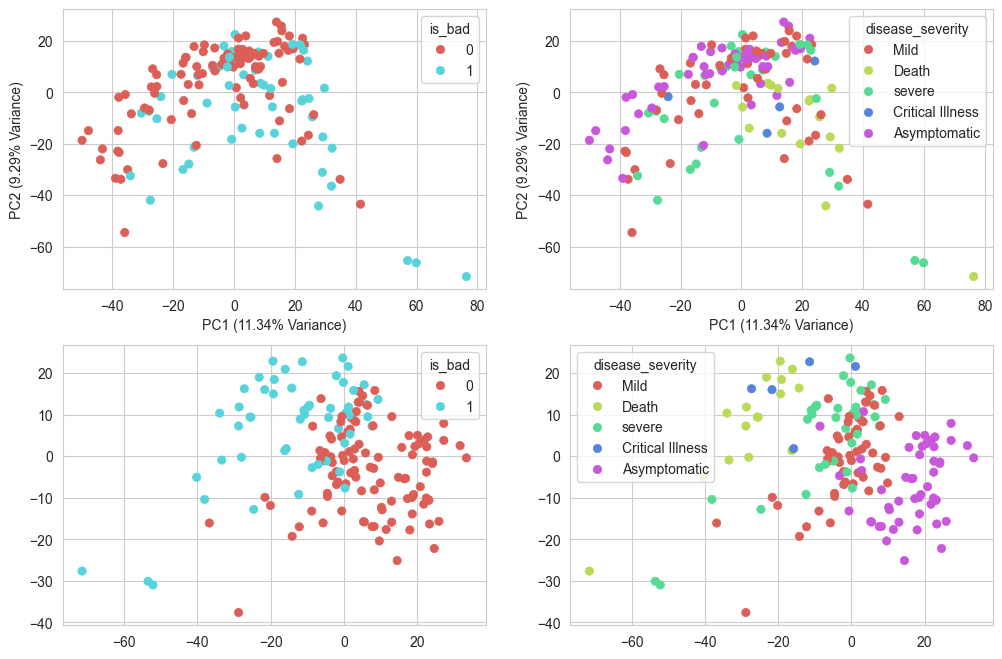

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

int_vals = np.log1p(int_df)
scaled_vals = StandardScaler().fit_transform(int_vals.T)
pca = PCA(n_components=0.95)
pcs = pca.fit_transform(scaled_vals)


plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x=pcs[:, 0], y=pcs[:, 1], edgecolor=None, hue=meta_df['is_bad'], palette='hls')
explained_variance_ratio = pca.explained_variance_ratio_
plt.xlabel(f"PC1 ({explained_variance_ratio[0]*100:.2f}% Variance)")
plt.ylabel(f"PC2 ({explained_variance_ratio[1]*100:.2f}% Variance)")

plt.subplot(2, 2, 2)
sns.scatterplot(x=pcs[:, 0], y=pcs[:, 1], edgecolor=None, hue=meta_df['disease_severity'], palette='hls')
explained_variance_ratio = pca.explained_variance_ratio_
print(len(explained_variance_ratio))
plt.xlabel(f"PC1 ({explained_variance_ratio[0]*100:.2f}% Variance)")
plt.ylabel(f"PC2 ({explained_variance_ratio[1]*100:.2f}% Variance)")


from sklearn.cross_decomposition import PLSRegression
plt.subplot(2, 2, 3)
pls_da = PLSRegression(n_components=2)
X_pls_da = pls_da.fit_transform(scaled_vals, meta_df['is_bad'])[0]  # Get transformed X (2 components)
sns.scatterplot(x=X_pls_da[:, 0], y=X_pls_da[:, 1], edgecolor=None, hue=meta_df['is_bad'], palette='hls')


plt.subplot(2, 2, 4)
sns.scatterplot(x=X_pls_da[:, 0], y=X_pls_da[:, 1], edgecolor=None, hue=meta_df['disease_severity'], palette='hls')

4059


<Axes: xlabel='rt', ylabel='mz'>

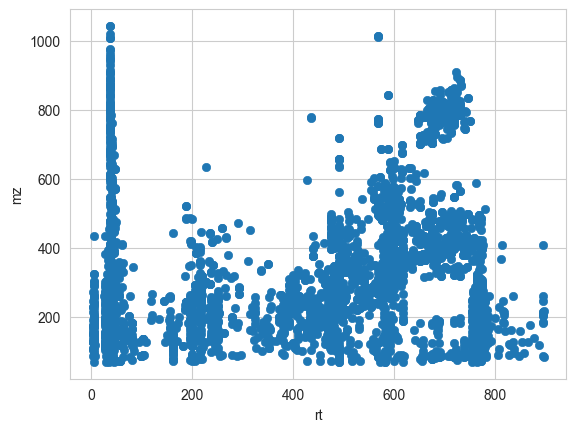

In [16]:
prs_feat_df = feat_df.iloc[:, :11].merge(int_df, left_index=True, right_index=True)
print(len(prs_feat_df))
sns.scatterplot(x=prs_feat_df['rt'], y=prs_feat_df['mz'], edgecolor=None)

In [17]:
# prs_feat_df.to_csv('data/trans_omic_untargeted/prs_feat_table_pos_rsd_1.csv', index=False)